<a href="https://colab.research.google.com/github/siddharthramagiri/Machine-Learning/blob/main/WeatherPrediction(Naive_Bayes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [34]:
data = pd.read_csv("/content/weather_forecast.csv")
data.head()

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [35]:
# Stings to Numericals Encoding
Encoder = LabelEncoder()

In [52]:
data['Outlook'] = Encoder.fit_transform(data['Outlook'])
data['Temperature'] = Encoder.fit_transform(data['Temperature'])
data['Humidity'] = Encoder.fit_transform(data['Humidity'])
data['Windy'] = Encoder.fit_transform(data['Windy'])
data.head(10)

,Outlook,Temperature,Humidity,Windy,Play
0,2,1,0,1,No
1,2,1,0,0,No
2,0,1,0,1,Yes
3,1,2,0,1,Yes
4,1,0,1,1,Yes
5,1,0,1,0,No
6,0,0,1,0,Yes
7,2,2,0,1,No
8,2,0,1,1,Yes
9,1,2,1,1,Yes


In [51]:
X = data.iloc[:,:4]
Y = data['Play']
X.head()

,Outlook,Temperature,Humidity,Windy
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1


In [38]:
from sklearn.model_selection import

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [58]:
print("X train : ",X_train.shape)
print("Y train : ",Y_train.shape)
print("X test : ",X_test.shape)
print("Y test : ",Y_test.shape)

X train :  (83, 4)
Y train :  (83,)
X test :  (21, 4)
Y test :  (21,)


In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
classifier = GaussianNB()
classifier.fit(X_train,Y_train)

GaussianNB()

In [42]:
classifier.score(X_test,Y_test)

0.7142857142857143

In [45]:
Prediction = classifier.predict(X_test)
Prediction

array(['No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'Yes'], dtype='<U3')

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

confusionMatrix = confusion_matrix(Y_test,Prediction)
print("Confusion Matrix : ",confusionMatrix)
accuracy = accuracy_score(Y_test, Prediction)
print("Accuracy : ", accuracy)
classification_report(Y_test, Prediction)

Confusion Matrix :  [[ 2  3]
 [ 3 13]]
Accuracy :  0.7142857142857143


'              precision    recall  f1-score   support\n\n          No       0.40      0.40      0.40         5\n         Yes       0.81      0.81      0.81        16\n\n    accuracy                           0.71        21\n   macro avg       0.61      0.61      0.61        21\nweighted avg       0.71      0.71      0.71        21\n'

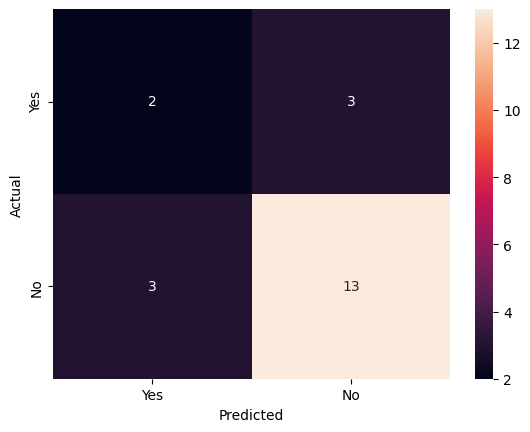

In [57]:
import seaborn as sns

sns.heatmap(data=confusionMatrix,annot=True,xticklabels=['Yes','No'], yticklabels=['Yes','No'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()